Odhad Odporového koeficientu
-----

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

from classes.projectile import Projectile
from classes.constant import *
from classes import trajectories as Trajectory

Odhad pro celoplášťovou střelu ráže .308 o hmotnosti 147 grains
---
Vytvoření vstupních dat pro celoplášťovou střelu ráže .308 o hmotnosti 147 grains

In [2]:
projectile = Projectile("S&B FMJ 147grs", cal_inch=0.308,
                        m_grs=147, SD_inch=0.221)
v_s = Trajectory.create_vs(
    (850, 775, 704, 636, 573, 512, 455, 400, 350),
    (0, 100, 200, 300, 400, 500, 600, 700, 800)
)


v0 = v_s[0, 0]

Výpočet odporového koeficientu podle zabudovaného exponenciálního modelu

In [3]:
Cd_calc = Trajectory.approximateCd(projectile, v0, v_s, "EXP")

d:\vscodeP\vvp\vvp-DU\ballistics\ballistics\classes\trajectories.py:81: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  trajectory = odeint(deriv, initial_state, t, args=(Cd, A, m))


In [4]:
print(f"Vypočítaný odporový koeficient Cd: {Cd_calc}")

Vypočítaný odporový koeficient Cd: 0.3098948896256368


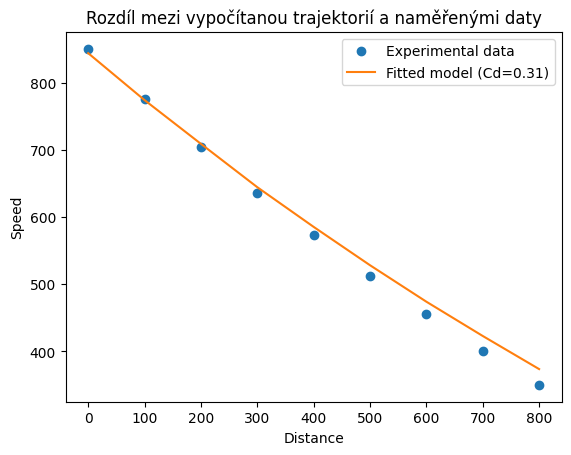

In [5]:
fitted_trajectory = Trajectory.trajectory(
    projectile, v0, Cd=Cd_calc, dragType="EXP")


fitted_trajectory = Trajectory.compact(
    fitted_trajectory, v_s[-1, 1], v_s[1, 1], v_s[0, 1])


plt.title("Rozdíl mezi vypočítanou trajektorií a naměřenými daty")

plt.plot(v_s[:, 1], v_s[:, 0], 'o', label='Experimental data')

plt.plot(v_s[:, 1], fitted_trajectory[:, 2], '-',
         label=f'Fitted model (Cd={Cd_calc:.2f})')

plt.xlabel('Distance')

plt.ylabel('Speed')

plt.legend()

plt.show()

Odhad pro poloplášťovou střelu ráže .308 o hmotnosti 180 grains
---

In [6]:
projectile180grs = Projectile(
    "S&B SP 180grs", cal_inch=0.308, m_grs=180, SD_inch=0.221)


v_s_180 = Trajectory.create_vs(
    (748, 654, 567, 486, 410, 342, 309, 290), (0, 100, 200, 300, 400, 500, 600, 700))


v0_180 = v_s_180[0, 0]

In [7]:
Cd_calc_180 = Trajectory.approximateCd(
    projectile180grs, v0_180, v_s_180, "CUBIC", Cd0=0.55)


print(f"Vypočítaný odporový koeficient Cd: {Cd_calc_180}\n")

Vypočítaný odporový koeficient Cd: 0.5235137687401594



d:\vscodeP\vvp\vvp-DU\ballistics\ballistics\classes\trajectories.py:81: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  trajectory = odeint(deriv, initial_state, t, args=(Cd, A, m))


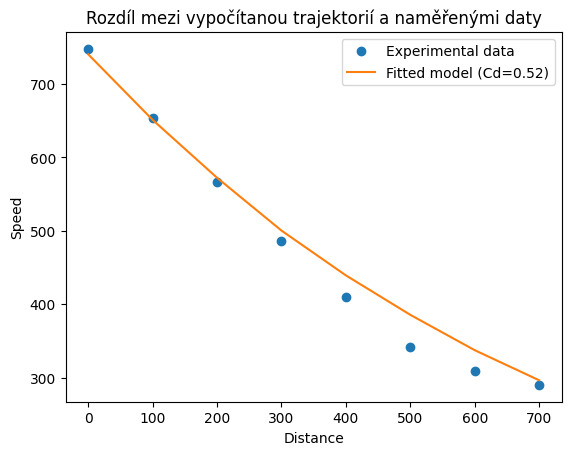

In [8]:
fitted_trajectory = Trajectory.trajectory(
    projectile180grs, v0_180, Cd=Cd_calc_180, dragType="CUBIC")


fitted_trajectory = Trajectory.compact(
    fitted_trajectory, v_s_180[-1, 1], v_s_180[1, 1], v_s_180[0, 1])


plt.title("Rozdíl mezi vypočítanou trajektorií a naměřenými daty")
plt.plot(v_s_180[:, 1], v_s_180[:, 0], 'o', label='Experimental data')

plt.plot(v_s_180[:, 1], fitted_trajectory[:, 2], '-',
         label=f'Fitted model (Cd={Cd_calc_180:.2f})')
plt.xlabel('Distance')
plt.ylabel('Speed')
plt.legend()
plt.show()